# Figure comparing weights, pressures and star formation rate surface densities for Figure 13 in Jeffreson et al. 2024b

In [1]:
import pickle
from pathlib import Path
import glob, os, re, sys
sys.path.append('../')

import configparser
config = configparser.ConfigParser()
config.read('../GalactISM1/config/config_pressures-SFRs.ini')

import numpy as np
from scipy.stats import binned_statistic_2d

import astro_helper as ah
import PRFM_helper as ph

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
from matplotlib.ticker import LogLocator
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')

# Load the data

In [2]:
titles = ['Milky Way-like', 'ETG, vlM', 'ETG, lowM', 'ETG, medM', 'ETG, hiM']

## PRFM, unresolved

In [3]:
# PRFM, unresolved files
dirs_prfm = [
    '/LtU/LOW-PRFM/',
    '/LOW-ETGs/vlM-PRFM/',
    '/LOW-ETGs/lowM-PRFM/',
    '/LOW-ETGs/medM-PRFM/',
    '/LOW-ETGs/hiM-PRFM/'
]
files_prfm = []
for dir_prfm in dirs_prfm:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_prfm+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_prfm.append(files)

In [4]:
tau_deps_prfm, SFRs_prfm = [], []
for files, title in zip(files_prfm, titles):
    print(title)
    tau_deps, SFRs = ph.collect_tau_deps(files)
    tau_deps_prfm.append(tau_deps)
    SFRs_prfm.append(SFRs)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


In [5]:
tau_dyns_prfm = []
for files, title in zip(files_prfm, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns_prfm(files)
    tau_dyns_prfm.append(tau_dyns)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


## PRFM, resolved

In [6]:
# PRFM, resolved files
dirs_prfm_res = [
    '/LtU/LOW-PRFM_RSLVD/',
    '/LOW-ETGs/vlM-PRFM-res/',
    '/LOW-ETGs/lowM-PRFM-res/',
    '/LOW-ETGs/medM-PRFM-res/',
    '/LOW-ETGs/hiM-PRFM-res/'
]
files_prfm_res = []
for dir_prfm_res in dirs_prfm_res:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_prfm_res+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_prfm_res.append(files)

In [7]:
tau_deps_prfm_res, SFRs_prfm_res = [], []
for files, title in zip(files_prfm_res, titles):
    print(title)
    tau_deps, SFRs = ph.collect_tau_deps(files)
    tau_deps_prfm_res.append(tau_deps)
    SFRs_prfm_res.append(SFRs)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


In [8]:
tau_dyns_prfm_res = []
for files, title in zip(files_prfm_res, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns_prfm(files)
    tau_dyns_prfm_res.append(tau_dyns)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


## Springel & Hernquist 03

In [9]:
# SH03 files
dirs_SH03 = [
    '/LtU/LOW-SH03/',
    '/LOW-ETGs/vlM/',
    '/LOW-ETGs/lowM/',
    '/LOW-ETGs/medM/',
    '/LOW-ETGs/hiM/'
]
files_SH03 = []
for dir_SH03 in dirs_SH03:
    files = glob.glob('/n/holystore01/LABS/itc_lab/Users/sjeffreson/'+dir_SH03+'/output/snap_*.hdf5')
    files = [x for _, x in sorted(zip([int(re.search(r'\d+', x).group()) for x in files], files))]
    files = files[5:]
    files_SH03.append(files)

In [10]:
tau_deps_SH03, SFRs_SH03 = [], []
for files, title in zip(files_SH03, titles):
    print(title)
    tau_deps, SFRs = ph.collect_tau_deps(files)
    tau_deps_SH03.append(tau_deps)
    SFRs_SH03.append(SFRs)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


In [11]:
tau_dyns_SH03 = []
for files, title in zip(files_SH03, titles):
    print(title)
    tau_dyns = ph.collect_tau_dyns(files, mode='SH03')
    tau_dyns_SH03.append(tau_dyns)

Milky Way-like
ETG, vlM
ETG, lowM
ETG, medM
ETG, hiM


## high-resolution galaxies

In [44]:
tags = ['MW', 'ETG-vlM', 'ETG-lowM', 'ETG-medM', 'ETG-hiM']

In [45]:
data_densities, data_PSFRs, data_sigmaeffs = [], [], []
for tag in tags:
    filesavedir = Path(config[tag]['ROOT_DIR']) / config[tag]['SUBDIR']

    # weight from this array (temperature threshold here has no impact)
    filesavenames = glob.glob(str(filesavedir / "Figs-10-11_*_T2.0e+04_avir2.0e+00.pkl")) # all times
    filenos = [int(item.rsplit('_'+tag)[0].rsplit('10-11_')[1]) for item in filesavenames]
    filesavenames = [name for _, name in sorted(zip(filenos, filesavenames))]
    #print(filesavenames)
    data_ = []
    for filesavename in filesavenames:
        with open(filesavename, "rb") as f:
            props_3D = pickle.load(f)
        data_.append(props_3D)
    data_densities.append(data_)

    # pressures, counts and SFRs from this array (respond to temperature threshold)
    filesavenames = glob.glob(str(filesavedir / "pressures-SFRs-fixed-mp_*_T2.0e+04_avir2.0e+00.pkl"))
    filenos = [int(item.rsplit('_'+tag)[0].rsplit('fixed-mp_')[1]) for item in filesavenames]
    filesavenames = [name for _, name in sorted(zip(filenos, filesavenames))]
    #print(filesavenames)
    data_ = []
    for filesavename in filesavenames:
        with open(filesavename, "rb") as f:
            props_3D = pickle.load(f)
        data_.append(props_3D)
    data_PSFRs.append(data_)

    # effective vertical velocity dispersions
    filesavenames = glob.glob(str(filesavedir / "sigma_eff-fixed-mp_*_T2.0e+04_avir2.0e+00.pkl"))
    filenos = [int(item.rsplit('_'+tag)[0].rsplit('fixed-mp_')[1]) for item in filesavenames]
    filesavenames = [name for _, name in sorted(zip(filenos, filesavenames))]
    #print(filesavenames)
    data_ = []
    for filesavename in filesavenames:
        with open(filesavename, "rb") as f:
            props_3D = pickle.load(f)
        data_.append(props_3D)
    data_sigmaeffs.append(data_)

In [46]:
# calculate medians and quantiles
THRESHOLD = 100 # on the number of gas cells per voxel at the mid-plane
# this is particularly important for the SigmaSFR, because SFR is stochastic in this simulation, and
# values do not make sense if averages/medians are taken over too few cells

data_alltime, data_PSFRs_alltime, data_sigmaeffs_alltime = [], [], []
for i, data_, data_PSFRs_, data_sigmaeffs_ in zip(range(len(data_densities)), data_densities, data_PSFRs, data_sigmaeffs):
    data_alltime_ = {key: [] for key in data_[0].keys()}
    data_PSFRs_alltime_ = {key: [] for key in data_PSFRs_[0].keys()}
    data_sigmaeffs_alltime_ = {key: [] for key in data_sigmaeffs_[0].keys()}
    for data__, data_PSFRs__, data_sigmaeffs__ in zip(data_, data_PSFRs_, data_sigmaeffs_):
        
        # take cuts to deal with stochasticity of the SFR, and to ensure the mid-plane
        # turbulent velocity dispersion is well-resolved
        cnd = (data_PSFRs__['midplane-count'] > THRESHOLD)
        for key, value in data_PSFRs__.items():
            value[~cnd] = np.nan
            data_PSFRs_alltime_[key].extend(value.flatten())
        for key, value in data__.items():
            if key != 'Kappa':
                value[~cnd] = np.nan
            data_alltime_[key].extend(value.flatten())
        for key, value in data_sigmaeffs__.items():
            value[~cnd] = np.nan
            data_sigmaeffs_alltime_[key].extend(value.flatten())
    data_alltime.append(data_alltime_)
    data_PSFRs_alltime.append(data_PSFRs_alltime_)
    data_sigmaeffs_alltime.append(data_sigmaeffs_alltime_)

/tmp/ipykernel_2682675/4108196814.py:12: RuntimeWarning: divide by zero encountered in divide
  tau_dep_Gyr = SigmaGas_cgs/SigmaSFR_cgs / ah.Gyr_to_s


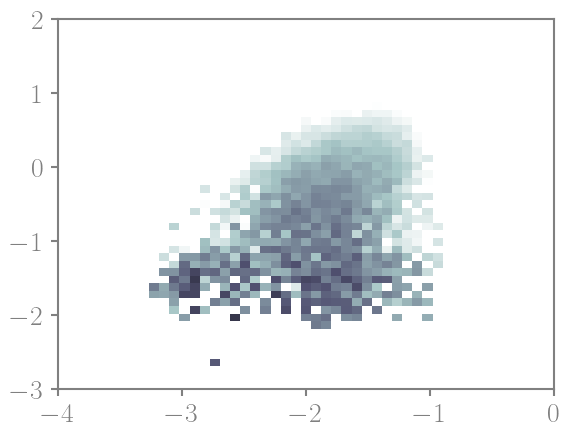

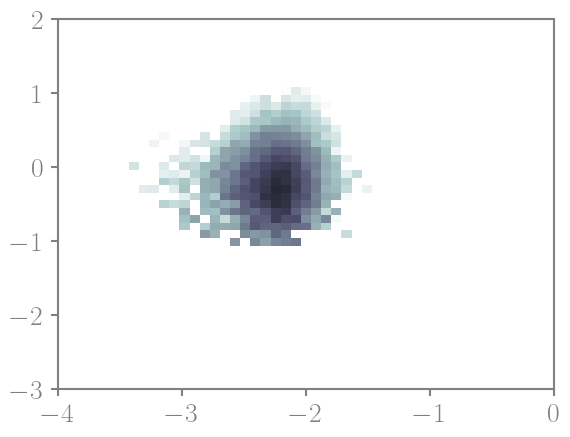

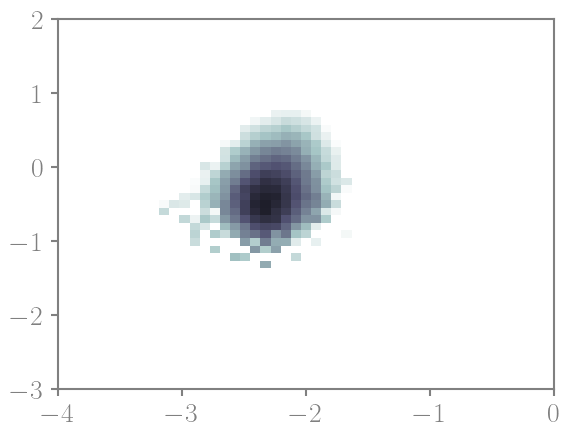

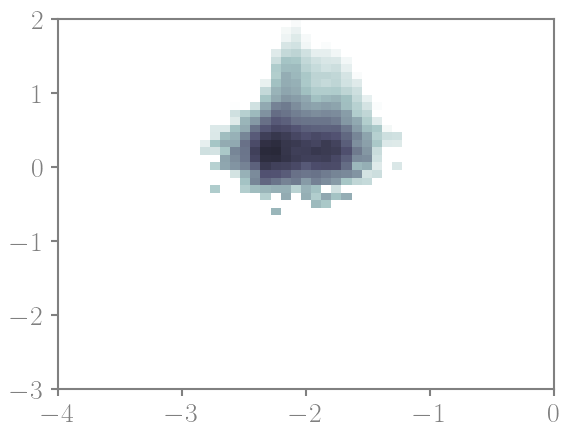

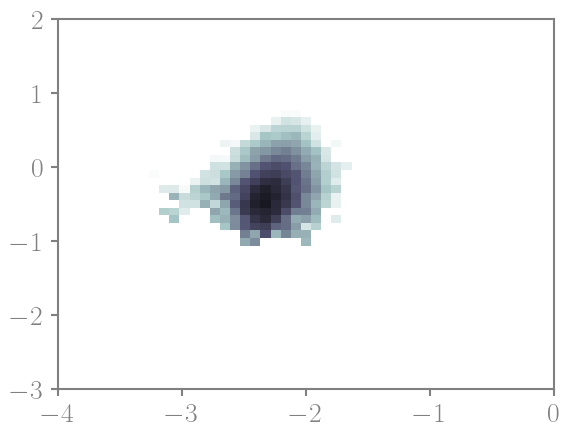

In [48]:
# THIS MAY NOT BE SAVED BEFORE CLUSTER WENT DOWN FOR MAINTENANCE! COPY BEFORE REFRESHING.
tau_deps_hr, tau_dyns_hr, SigmaSFRs_hr = [], [], []
for i in range(len(data_alltime)):
    # for depletion time
    SigmaGas_cgs = np.array(data_alltime[i]['SigmaGas']) * ah.Msol_to_g / ah.pc_to_cm**2
    SigmaSFR_cgs = np.array(data_PSFRs_alltime[i]['SigmaSFR']) * ah.Msol_to_g / ah.kpc_to_cm**2 / ah.yr_to_s
    # for dynamical time additionally
    sigmaeff_cgs = np.array(data_sigmaeffs_alltime[i]['sigma_eff'])
    Ptot_cgs = np.array(data_PSFRs_alltime[i]['Ptot']) * ah.kB_cgs
    
    # calculations
    tau_dep_Gyr = SigmaGas_cgs/SigmaSFR_cgs / ah.Gyr_to_s
    tau_dyn_Gyr = SigmaGas_cgs * sigmaeff_cgs / Ptot_cgs / ah.Gyr_to_s

    # thresholding
    cnd = ((~np.isinf(tau_dep_Gyr)) & (~np.isinf(tau_dyn_Gyr)))
    frac_SFR, _, _, _ = binned_statistic_2d(
        np.log10(tau_dyn_Gyr[cnd]), np.log10(tau_dep_Gyr[cnd]),
        SigmaSFR_cgs[cnd], statistic='sum',
        bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
    )
    frac_SFR /= np.sum(frac_SFR)
    plt.imshow(frac_SFR.T, origin='lower',
                     extent=(-4., 0., -3., 2.), aspect='auto',
                     cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
    plt.show()

    # store
    tau_deps_hr.append(tau_dep_Gyr[cnd])
    tau_dyns_hr.append(tau_dyn_Gyr[cnd])
    SigmaSFRs_hr.append(SigmaSFR_cgs[cnd])

# figure

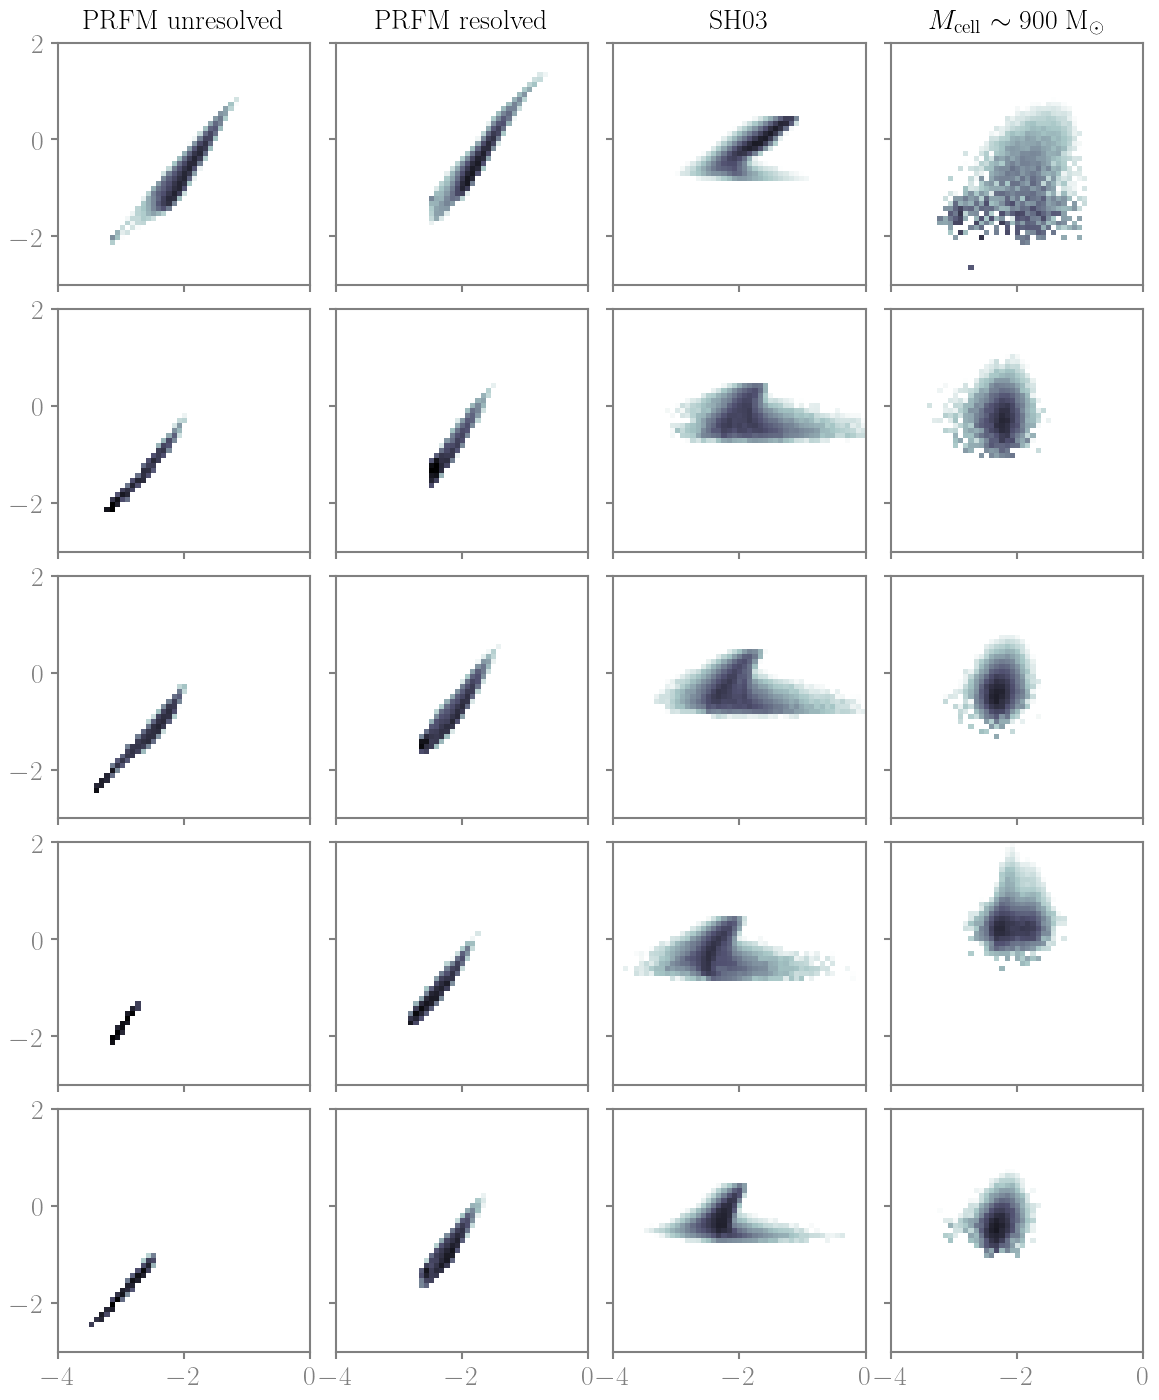

In [50]:
# 2D histogram of tau_dyn (x-axis) vs. tau_dep (y-axis) for PRFM and control (SH03) case,
# on two separate axes
fig, ax = plt.subplots(5, 4, figsize=(14, 17))

# PRFM unresolved
for i in range(5):
    tau_deps, tau_dyns, SFRs = tau_deps_prfm[i], tau_dyns_prfm[i], SFRs_prfm[i]
    frac_SFR, _, _, _ = binned_statistic_2d(
        np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
        SFRs, statistic='sum',
        bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
    )
    frac_SFR /= np.sum(frac_SFR)
    ax[i,0].imshow(frac_SFR.T, origin='lower',
                     extent=(-4., 0., -3., 2.), aspect='auto',
                     cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[0,0].set_title('PRFM unresolved', pad=10, fontsize=20)

# PRFM resolved
for i in range(5):
    tau_deps, tau_dyns, SFRs = tau_deps_prfm_res[i], tau_dyns_prfm_res[i], SFRs_prfm_res[i]
    frac_SFR, _, _, _ = binned_statistic_2d(
        np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
        SFRs, statistic='sum',
        bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
    )
    frac_SFR /= np.sum(frac_SFR)
    ax[i,1].imshow(frac_SFR.T, origin='lower',
                     extent=(-4., 0., -3., 2.), aspect='auto',
                     cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[0,1].set_title('PRFM resolved', pad=10, fontsize=20)

# SH03
for i in range(5):
    tau_deps, tau_dyns, SFRs = tau_deps_SH03[i], tau_dyns_SH03[i], SFRs_SH03[i]
    frac_SFR, _, _, _ = binned_statistic_2d(
        np.log10(tau_dyns/ah.Gyr_to_s), np.log10(tau_deps/ah.Gyr_to_s),
        SFRs, statistic='sum',
        bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
    )
    frac_SFR /= np.sum(frac_SFR)
    ax[i,2].imshow(frac_SFR.T, origin='lower',
                     extent=(-4., 0., -3., 2.), aspect='auto',
                     cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[0,2].set_title('SH03', pad=10, fontsize=20)

# high-resolution
for i in range(5):
    tau_deps, tau_dyns, SFRs = tau_deps_hr[i], tau_dyns_hr[i], SigmaSFRs_hr[i]
    frac_SFR, _, _, _ = binned_statistic_2d(
        np.log10(tau_dyns), np.log10(tau_deps),
        SFRs, statistic='sum',
        bins=(np.linspace(-4., 0., 50), np.linspace(-3., 2., 50))
    )
    frac_SFR /= np.sum(frac_SFR)
    ax[i,3].imshow(frac_SFR.T, origin='lower',
                     extent=(-4., 0., -3., 2.), aspect='auto',
                     cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-4, vmax=1.e-1))
ax[0,3].set_title(r'$M_{\rm cell} \sim 900~{\rm M}_\odot$', pad=10, fontsize=20)

# remove y-labels
for i in range(1, 4):
    for j in range(5):
        ax[j,i].set_yticklabels([])
# remove x-labels
for i in range(4):
    for j in range(4):
        ax[j,i].set_xticklabels([])

plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()